## Logistic Regression (Useful Code) 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import pickle
import scipy
import statsmodels.api as sm
from datetime import datetime
import os
%matplotlib inline

In [ ]:
import sys
sys.path.append("../functions/")

In [53]:
import Scripts_LogRegModels_v2
reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

### Fit Single Subject (Split Models)

In [81]:
param_sets_split = {}

# baseline 
param_sets_split['0'] = ['mag_diff','prob_diff']
param_sets_split['1'] = ['mag_diff','prob_diff','sqrt_prop_revealed']



In [ ]:
datadir = '../../tasklogs/combined/*'
files = glob.glob(datadir)

filee = files[100]  # check files
print(filee)
trial_table = get_trial_table(filee,combined=True)


In [68]:

out = fit_model_split_amb_unamb_gain_loss(trial_table,whichreturn='ambig_gain',
                                          params=param_sets_split['18'],zscore=False)
print(out['aic'])
print(out['pred_acc'])
print(out['modelname'])
out['results'].summary()

../../tasklogs/combined/hit_batch_2017_4_17_ambicombined_AIICJA0A5J8NF_duplicates_dropped.csv
87.1463437086
0.805194805195
model_split_ambig_gainmag_diff_prob_diff_prob_unambig_sqrt_prop_revealed_inter_prob_diff_sqrt_prop_revealed


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Aug 2017   Pseudo R-squ.:                  0.1844
Time:                        16:30:05   Log-Likelihood:                -37.573
converged:                       True   LL-Null:                       -46.067
                                        LLR p-value:                  0.004524
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
intercept                              0.5328      1.269      0.420      0.675        -1.954     3.020
mag_diff_amb_gain                      0.0234      0.011      2.049      0.041         0.001     0.046
prob_diff_amb_gain                     2.4497      2.609      0.939      0.348        -2.665     7.564
prob_unambig_gain                     -2.1948      2.160     -1.016      0.310        -6.429     2.040
sqrt_prop_revealed_gain               -0.9510      1.501     -0.633      0.526        -3.893     1.991
inter_prob_diff_sqrt_prop_revealed     2.6049      4.278      0.609      0.543        -5.779    10.989
======================================================================================================
"""

In [32]:
#X = out['X']
#X.drop('trial_number',axis=1)


In [33]:
out['X'].corr()

,intercept,mag_diff_amb_gain,prob_diff_amb_gain,sqrt_prop_revealed_gain,inter_mag_diff_sqrt_prop_revealed
intercept,NaN,NaN,NaN,NaN,NaN
mag_diff_amb_gain,NaN,1.000000,-0.605957,-0.234965,0.849206
prob_diff_amb_gain,NaN,-0.605957,1.000000,0.199467,-0.613181
sqrt_prop_revealed_gain,NaN,-0.234965,0.199467,1.000000,-0.452540
inter_mag_diff_sqrt_prop_revealed,NaN,0.849206,-0.613181,-0.452540,1.000000


## Fitting all subjects 

In [131]:
# all subjects
datadir = '../../tasklogs/combined/*'
filelist = glob.glob(datadir)

## fit subjects that failed 
# datadir = '../../tasklogs/combined/*'
# filelist = [glob.glob( '../../tasklogs/combined/*'+mid+'*')[0] for mid in MIDs_to_refit]
# filelist


In [132]:
# specify 
whichones = ['0']

for f,filee in enumerate(filelist):

    # sub name 
    filename = os.path.basename(filee).split('.')[0]
    MID = filename.split('_')[-3]
    print(MID)

    # get trial table 
    try:
        trial_table = get_trial_table(filee,combined=True)
    
        split models 
        
        for paramnum in whichones:
            for split in ['ambig_gain','ambig_loss']:
            #for split in ['unambig_gain','unambig_loss']:
                out = fit_model_split_amb_unamb_gain_loss(trial_table,whichreturn=split,params=param_sets_split[paramnum])
                modelname = out['modelname']
                print(modelname)
                pickle.dump(out,open('../results/log_reg_model_results/individual_subjects/'+
                        filename+'_'+modelname+'.p', "wb" ))


    except:
        print('failed: /n {0}').format(file)

A15XX0WDRG29E7
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_gain
B0       -0.503871
B1        1.425925
B2        6.356313
alpha    14.909033
beta      1.000000
dtype: float64
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_loss
B0        1.390575
B1       -1.476053
B2       10.000000
alpha    39.771922
beta      1.000000
dtype: float64
A1JV64BL3WCK0G
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_gain
B0        0.015457
B1        7.567056
B2        0.144348
alpha    30.890606
beta     50.000000
dtype: float64
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_loss
B0        0.530606
B1      -10.000000
B2        7.202335
alpha     5.483387
beta      4.247632
dtype: float64
A1LTJHPUTL7WM9
optimization initalization:0
optimization initalization:1
o

optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_gain
B0       -0.936270
B1       -2.636770
B2        6.865361
alpha    24.243839
beta     39.114728
dtype: float64
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_loss
B0        0.356147
B1        1.653432
B2       10.000000
alpha     6.592842
beta      1.000000
dtype: float64
A12HZGOZQD5YK7
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_gain
B0      -0.391284
B1       6.437263
B2       3.990364
alpha    1.375927
beta     1.000000
dtype: float64
optimization initalization:0
optimization initalization:1
optimization initalization:2
flexible_prior2_ambig_loss
B0       0.576088
B1      -3.324617
B2       3.507927
alpha    2.892727
beta     1.000000
dtype: float64
A12K9210P1R1DN
optimization initalization:0
optimization initalization:1
optimization initalization

limit_output extension: Maximum message size of 10000 exceeded with 10102 characters

### Creating a dataframe with model parameters (Does not work at the moment)

In [71]:
data_participants = pd.read_csv('../results/sub_table.csv')

results_folder = '../results/log_reg_model_results/individual_subjects/'
resultnames = ['bic','aic','pseudoR2','pred_acc']

whichones = ['0','1','2']
whichones = ['3','4']
#whichones = ['5','6','7','8','9']
whichones = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
# whichones = ['10','11','13','14']

# whichones = ['0','1','8']
# whichones = ['-1']
# whichones = ['2','3']

#whichones = ['-1','2','3','4','5']
whichones=['4','5','6']
whichones=['18']
for paramnum in whichones:
    try:
        
        for split in ['ambig_gain','ambig_loss']:
        #for split in ['unambig_gain','unambig_loss']:
            modelname = 'model_split_'+split+'_'.join(param_sets_split[paramnum])
            files = glob.glob(results_folder+'*'+modelname+'.p')
            for filee in files:
                model_results = pickle.load(open(filee,'rb'))
                MID = str(model_results['MID'])
                task = get_gain_loss_from_filename(filee)
                params = model_results['params']

                for result in resultnames:
                    data_participants.loc[(data_participants.MID==MID) & 
                                      (data_participants.date==str(get_date_from_filename(filee))),
                                       modelname+'_'+result+'_'+task]=model_results[result]
                for param in params.index:
                    data_participants.loc[(data_participants.MID==MID) & 
                                      (data_participants.date==str(get_date_from_filename(filee))),
                                       modelname+'_'+param+'_'+task]=params[param]
    except:
        print('didnt add:'+paramnum)
        
data_participants.to_csv('../results/sub_table.csv',index=None)

### Model Cross Validated Accuracy (Specify Model by Name)
- split models don't have cv accuracy right now

In [91]:

modelname ='model_split_'+'ambig_gain'+'_'.join(param_sets_split['0'])
modelname

'model_split_ambig_gainmag_diff_prob_diff'

In [96]:

x1 = data_participants[modelname+'_pred_acc_cv_mean_combined'].as_matrix()
#x2 = d2['model_singRL_cat_pred_acc_cv_mean_gain'].as_matrix()
sns.set_context('paper',font_scale=1.5)
sns.set_style('white',{'figure.facecolor':'white'})
plt.hist(x1[~np.isnan(x1)],alpha=0.5,label='combined group')
#plt.hist(x2[~np.isnan(x2)],alpha=0.4,label='gain group')
plt.xlabel('cross validated pred accuracy')
plt.ylabel('people')
plt.legend()
sns.despine()
plt.savefig('../figs/'+datasetfolder+'/pred_acc_cv_mean_combined_v_gain.png',dpi=300)

## Single Model Plots

### Load Data - replace with function 

In [202]:
# Choose model - Split MOdels. by loss gain / ambig / unambig 

task = 'combined'
split='ambig_gain'
split='ambig_loss'
modelname = 'model_split_'+split+'_'.join(param_sets_split['10'])

print(modelname)


# create more specific parameter dataframe 
df=get_params_df(modelname,task,data_participants,combined=True)

# Remove Empty Subjects 
print(len(df.MID.unique()))
df = df.loc[~np.isnan(df['beta']),:] # remove Nan's
print(len(df.MID.unique()))

# Remove Bad subjects 
print('removing bad subjects')
df=remove_bad_participants(df,task)
print(len(df.MID.unique()))

model_split_ambig_lossmag_diff_prob_diff_prob_unambig_sqrt_prop_revealed
['intercept', 'mag_diff_amb_loss', 'prob_diff_amb_loss', 'prob_unambig_loss', 'sqrt_prop_revealed_loss']
154
152
removing bad subjects
152


In [ ]:
# LOAD DATA 
data_participants = pd.read_csv('../results/sub_table.csv')
data_participants = data_participants.loc[
    ~np.isnan(data_participants.num_no_resp_combined)&
    ((data_participants.date=='2017-04-17')|(data_participants.date=='2017-03-06'))|(data_participants.date=='2017-06-14')]
datasetfolder='datasetb'


### Bar plots

- requires data_participants_loaded from above

In [188]:

# single bar graph for now 
def plot_params(df,stripplot=False,outlier_cutoff=None,outcome=''):
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    matplotlib.rc("font", family="Times New Roman")
    sns.set_context('talk')
    sns.set_style('white',{'figure.facecolor':'white'})
    
    print(len(df.MID.unique()))
    if outlier_cutoff is not None:
        df = df[(df.beta>-1.0*outlier_cutoff)&(df.beta<outlier_cutoff)]
    print(len(df.MID.unique()))
    axis = sns.barplot(x='parameter',y='beta',data=df,color=[.4,.4,.4],ci=95,alpha=0.4)
    
    if stripplot:
        sns.stripplot(x="parameter", y="beta", data=df,color=[.4,.4,.4],alpha=0.2,jitter=True);

        
    current_palette=sns.color_palette()
    fig = plt.gcf()
    fig.suptitle('Model Parameters: '+modelname+' '+task,fontsize=12,x=0.55)
    sns.despine(ax=axis)
    axis.set_ylabel('beta (Prob Choose Right (except on Ambig))',fontsize=12)
    axis.set_xlabel('parameter',fontsize=12)
    axis.set_xticklabels(df.parameter.unique(),rotation=45,fontsize=12,ha='right')
    axis = plt.gca()
    
    # change name if needed
    xlabels = axis.get_xticklabels()
    # namechanges ={}
    # namechanges['intercept_r']='intercept (right button)'
    #newlabels = [namechanges[xlabel.get_text()] for xlabel in xlabels]
    #axis.set_xticklabels(newlabels)

    #for xi,xlabel in enumerate(xlabels):
        # color 
#         if 'loss' in xlabel.get_text():
#             axis.patches[xi].set_color(current_palette[2])
#         if 'gain' in xlabel.get_text():
#             axis.patches[xi].set_color(current_palette[0])
    fig.suptitle('')
    axis.set_title('Model Parameters (Across all Subjects) '+str(outcome))
    axis.set_xlabel('Parameter')
    axis.set_ylabel('Group Regression Coefficients \n (Probability Choosing Ambig)')
    plt.tight_layout()
    return(fig)

In [189]:
df.head()

,MID,CameBackTwice,no_brainer_per_cor_gain,no_brainer_per_cor_loss,num_no_resp_combined,ntrials_combined,date,STAI_Trait,BDI,MASQ.AD,STAI_Trait_dep,PSWQ,MASQ.AA,model_split_ambig_gainmag_diff_prob_diff_prob_unambig_sqrt_prop_revealed_pred_acc_combined,parameter,beta,task,outcome type
0,A0017268R9SKD8U2Y3F,NaN,0.882353,1.000000,0,300,2017-04-17,42,1,44,22,78,20,0.896104,intercept,-1.057519,combined,shared
1,A12HZGOZQD5YK7,NaN,1.000000,0.941176,0,300,2017-04-17,49,11,76,34,80,19,0.805195,intercept,-0.482394,combined,shared
2,A12K9210P1R1DN,NaN,0.823529,0.875000,0,286,2017-04-17,28,7,43,18,51,22,0.943662,intercept,-2.239903,combined,shared
3,A14ADQ7RUN6TDY,NaN,0.764706,0.882353,0,300,2017-04-17,37,3,56,28,36,20,0.701299,intercept,-0.429727,combined,shared
4,A14TOBAPF6MMB5,NaN,0.941176,0.882353,0,300,2017-04-17,42,15,79,31,53,29,0.740260,intercept,-0.301602,combined,shared


152
152


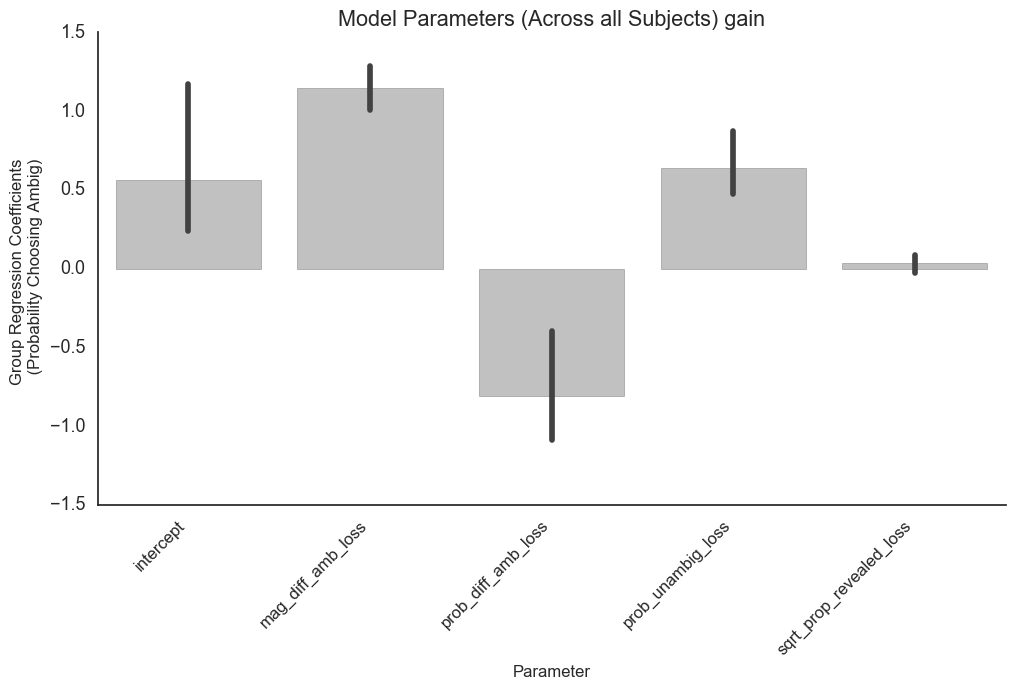

In [203]:
fig=plot_params(df,stripplot=False,outlier_cutoff=50,outcome='gain')
plt.savefig('../figs/'+datasetfolder+'/'+modelname+'_'+task+'_parameters.png',dpi=300)

### Anova and T-tests on Model Params

In [112]:
import scipy.stats
x1= df.loc[df['parameter']=='beta','beta'].as_matrix()
x2= df.loc[df['parameter']=='alpha','beta'].as_matrix()

# select 
selector = np.logical_and(np.abs(x1)<50, np.abs(x2)<50)
x1 = x1[selector]
x2 = x2[selector]


print(scipy.stats.ttest_1samp(x1,0))
print(scipy.stats.ttest_1samp(x2,0))
print(scipy.stats.ttest_rel(x1,x2))



Ttest_1sampResult(statistic=9.8115103085955493, pvalue=2.5644758662130159e-16)
Ttest_1sampResult(statistic=10.276156551198241, pvalue=2.4575293519287777e-17)
Ttest_relResult(statistic=-1.360203054769449, pvalue=0.17682411139630916)


### Scatters single model Params with Single Trait

intercept
mag_diff_amb_loss
prob_diff_amb_loss
prob_unambig_loss
sqrt_prop_revealed_loss


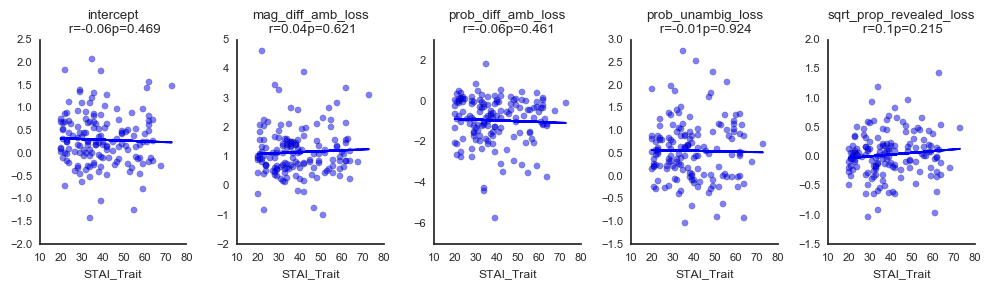

In [204]:
params = df.parameter.unique()

sns.set_context('paper')


outlier_cutoff =10
df = df[(df.beta>-1.0*outlier_cutoff)&(df.beta<outlier_cutoff)]

traits = ['STAI_Trait']#,'MASQ.AD','PSWQ']
for t,trait in enumerate(traits):
    fig,axes = plt.subplots(1,len(params),figsize=(len(params)*2,3))
    axes = axes.flatten()
    i=0
    for param in params:
        
        dft = df.loc[df['parameter']==param,]
        x = dft[trait].as_matrix()
        y = dft['beta'].as_matrix()
        nans = np.logical_and(~np.isnan(x), ~np.isnan(y))
        x=x[nans]
        y=y[nans]
        (r,p) =scipy.stats.spearmanr(x,y)
        r = np.round(r,2)
        p = np.round(p,3)
        axes[i].scatter(x,y,alpha=0.5)
        
        X = sm.add_constant(x, prepend=False)
        res_ols = sm.OLS(y, X).fit()
        p_ols=res_ols.pvalues[0]
        b_ols=res_ols.params[0]
        intercept = res_ols.params[1]
        axes[i].plot(X[:,0],b_ols*X[:,0]+intercept,color='b')
        
        
        axes[i].set_title(param+'\n r='+str(r)+'p='+str(p))
        axes[i].set_xlabel(trait)
        sns.despine()
        print(param)
        i+=1
    plt.tight_layout()
    plt.savefig('../figs/'+datasetfolder+'/scatter_'+trait+modelname+'.png',dpi=300)